In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ALLCools.plot import *
from amb import *

In [2]:
adata = anndata.read_h5ad('final_with_coords.atac_correct.h5ad')
adata

AnnData object with n_obs × n_vars = 826988 × 272436
    obs: 'Modalities', 'leiden'
    uns: 'leiden', 'neighbors'
    obsm: 'X_pca', 'X_tsne'
    obsp: 'connectivities', 'distances'

## plot integraion result

In [3]:
modality_palette = get_modality_palette()
modality_palette = {
 'snmC': '#36AE37',
 'snm3C': '#E71F19',
 'ATAC': '#EF7D1A',
 'Multiome': '#7D4195',
 }

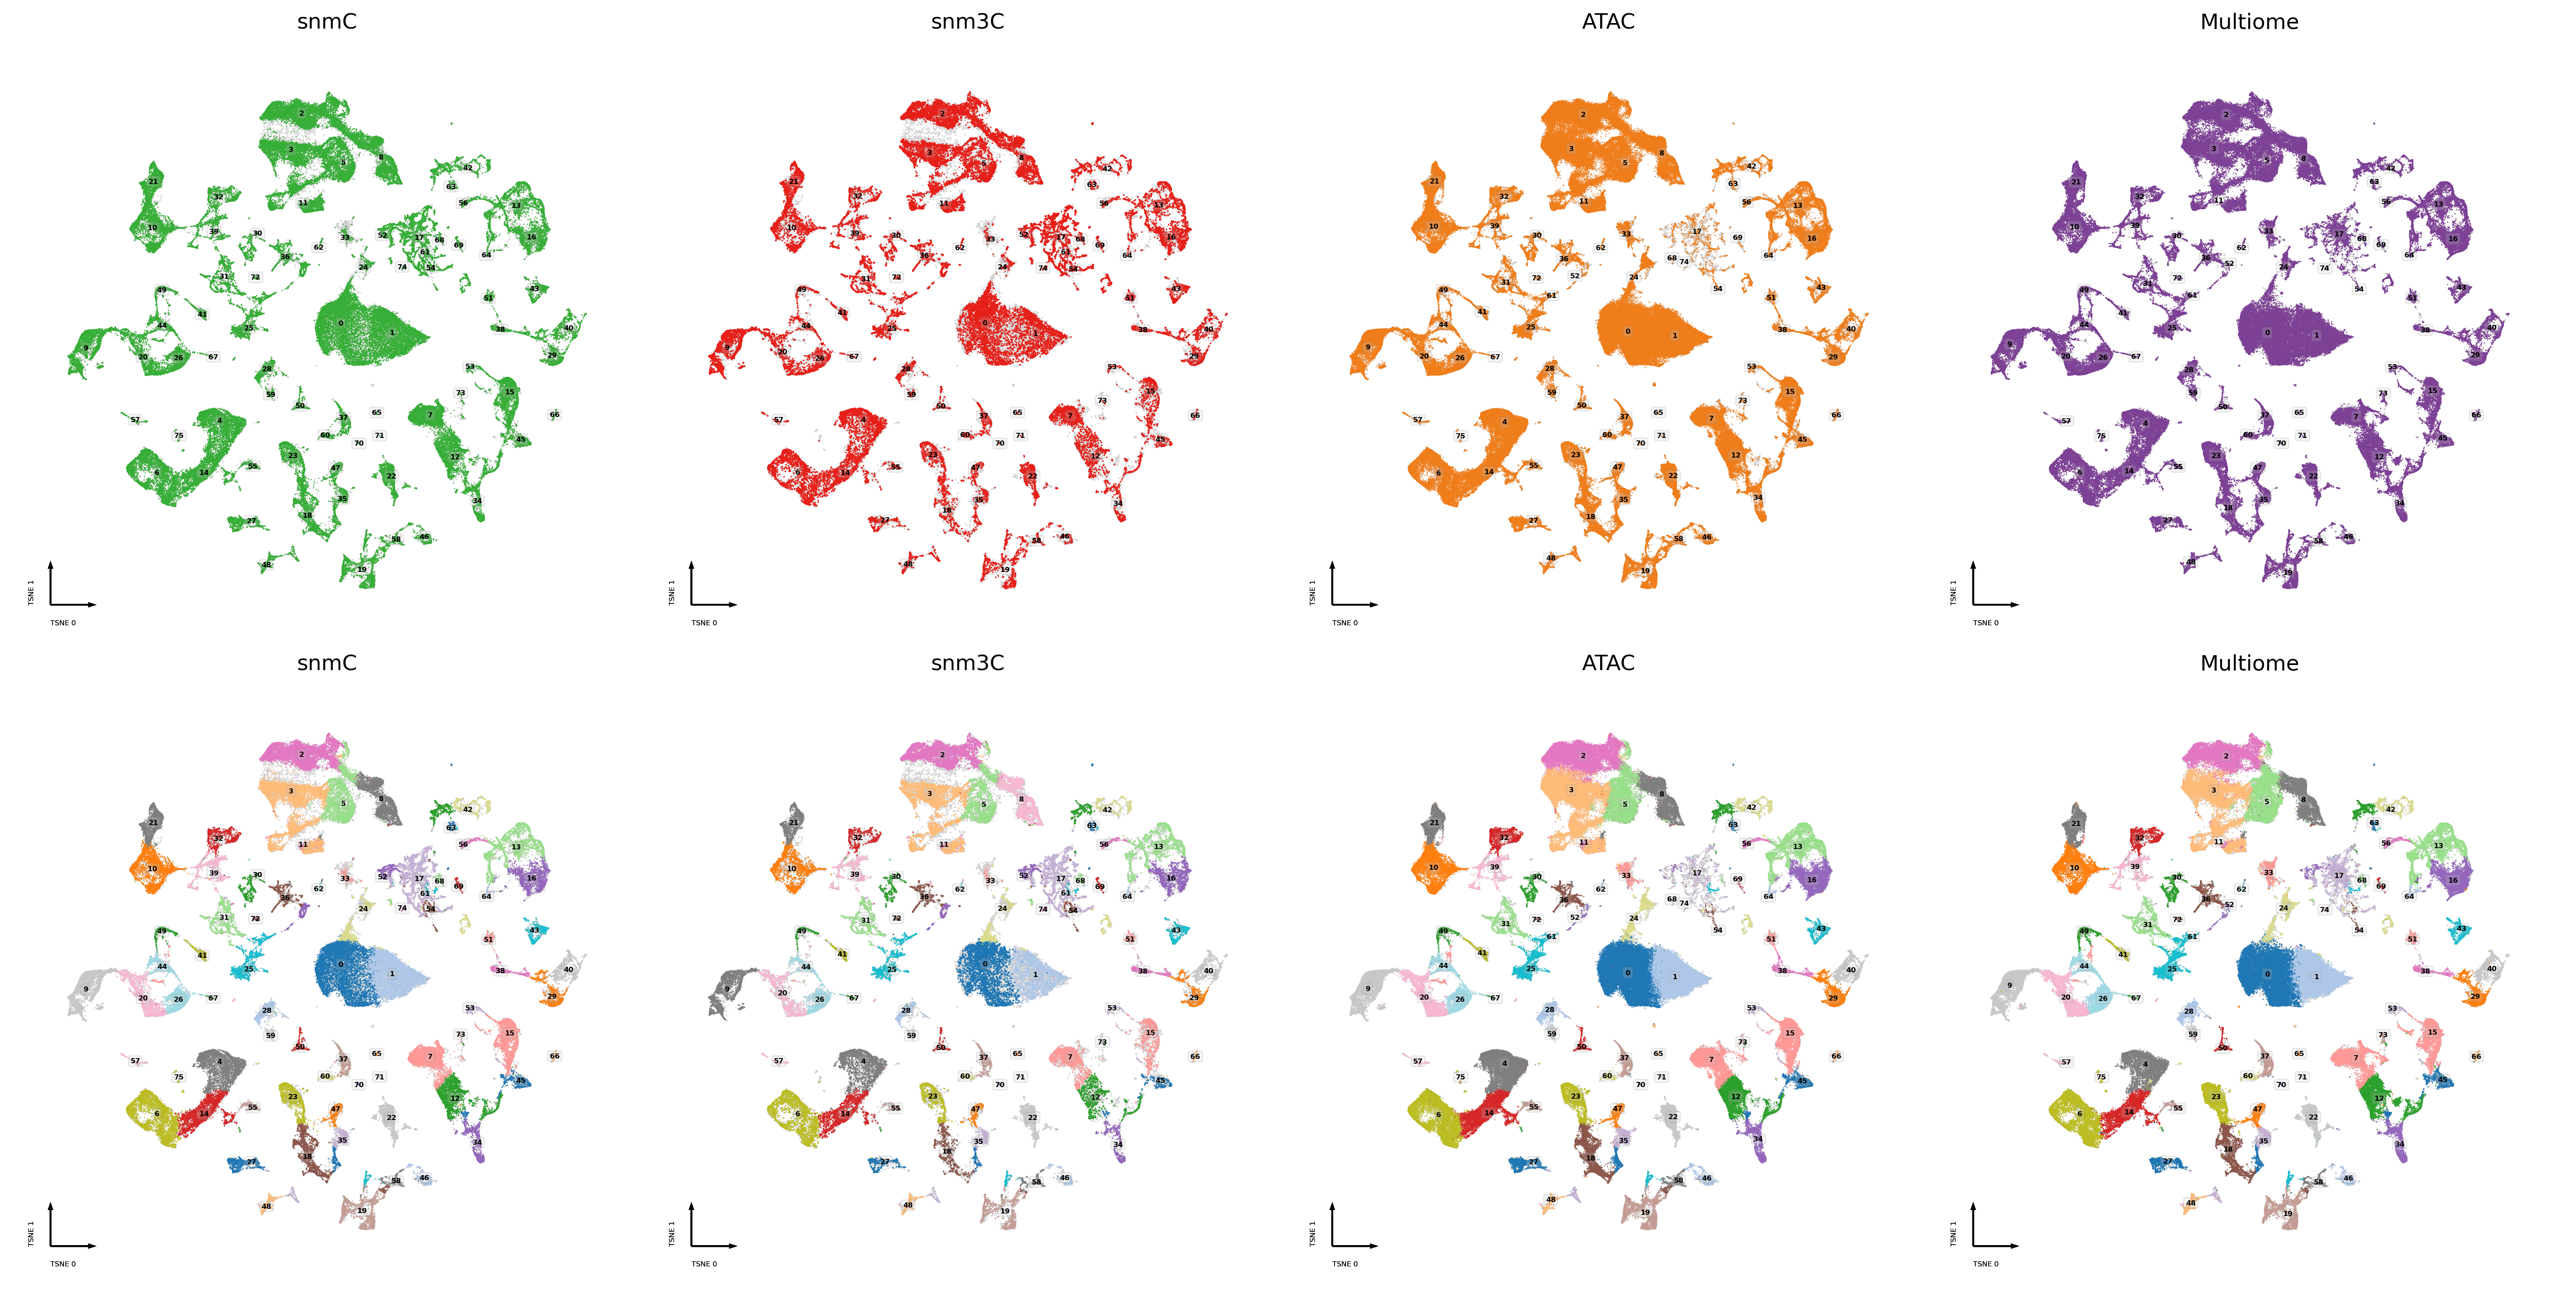

In [4]:
fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=4, dpi=300, constrained_layout = True)

for i, modality in enumerate(modality_palette.keys()):
    # Top row plots
    ax = axes[0, i]
    categorical_scatter(data=adata, ax=ax, rasterized=True, color="lightgrey", coord_base="tsne")
    categorical_scatter(
        data=adata[adata.obs["Modalities"] == modality],
        ax=ax,
        color=modality_palette[modality],
        max_points=None,
        coord_base="tsne",
        rasterized=True, 
        text_anno='leiden'
    )
    ax.set_title(modality)

    # Bottom row plots
    ax_middle = axes[1, i]
    categorical_scatter(data=adata, ax=ax_middle, rasterized=True, color="lightgrey", coord_base="tsne")
    categorical_scatter(
        data=adata[adata.obs["Modalities"] == modality],
        ax=ax_middle,
        hue='leiden',
        text_anno='leiden',
        max_points=None,
        palette='tab20',
        coord_base="tsne",
        rasterized=True, 
    )
    ax_middle.set_title(modality)
fig.savefig('Integration.Leiden.pdf', bbox_inches = 'tight')

## plot region

In [3]:
mc_adata = adata[adata.obs["Modalities"] == 'snmC'].copy()
m3c_adata = adata[adata.obs["Modalities"] == 'snm3C'].copy()
atac_adta = adata[adata.obs["Modalities"] == 'ATAC'].copy()
multiome_adata = adata[adata.obs["Modalities"] == 'Multiome'].copy()

In [4]:
mc_meta = pd.read_csv('fixed_mc_meta.csv', index_col = 0)
m3c_meta = pd.read_csv('fixed_m3c_meta.csv', index_col = 0)
atac_meta = pd.read_csv('region_added.fixed_atac_meta.csv', index_col = 0)
multiome_meta = pd.read_csv('region_added.fixed_multiome_meta.csv', index_col = 0)

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
_var = 'Region'

In [6]:
mc_adata.obs[_var] =  mc_meta[_var]
m3c_adata.obs[_var] =  m3c_meta[_var]

atac_adta.obs[_var] =  atac_meta[_var]
multiome_adata.obs[_var] =  multiome_meta[_var]

In [7]:
dissection_region_palette = get_dissection_region_palette()
major_region_palette = get_major_region_palette()

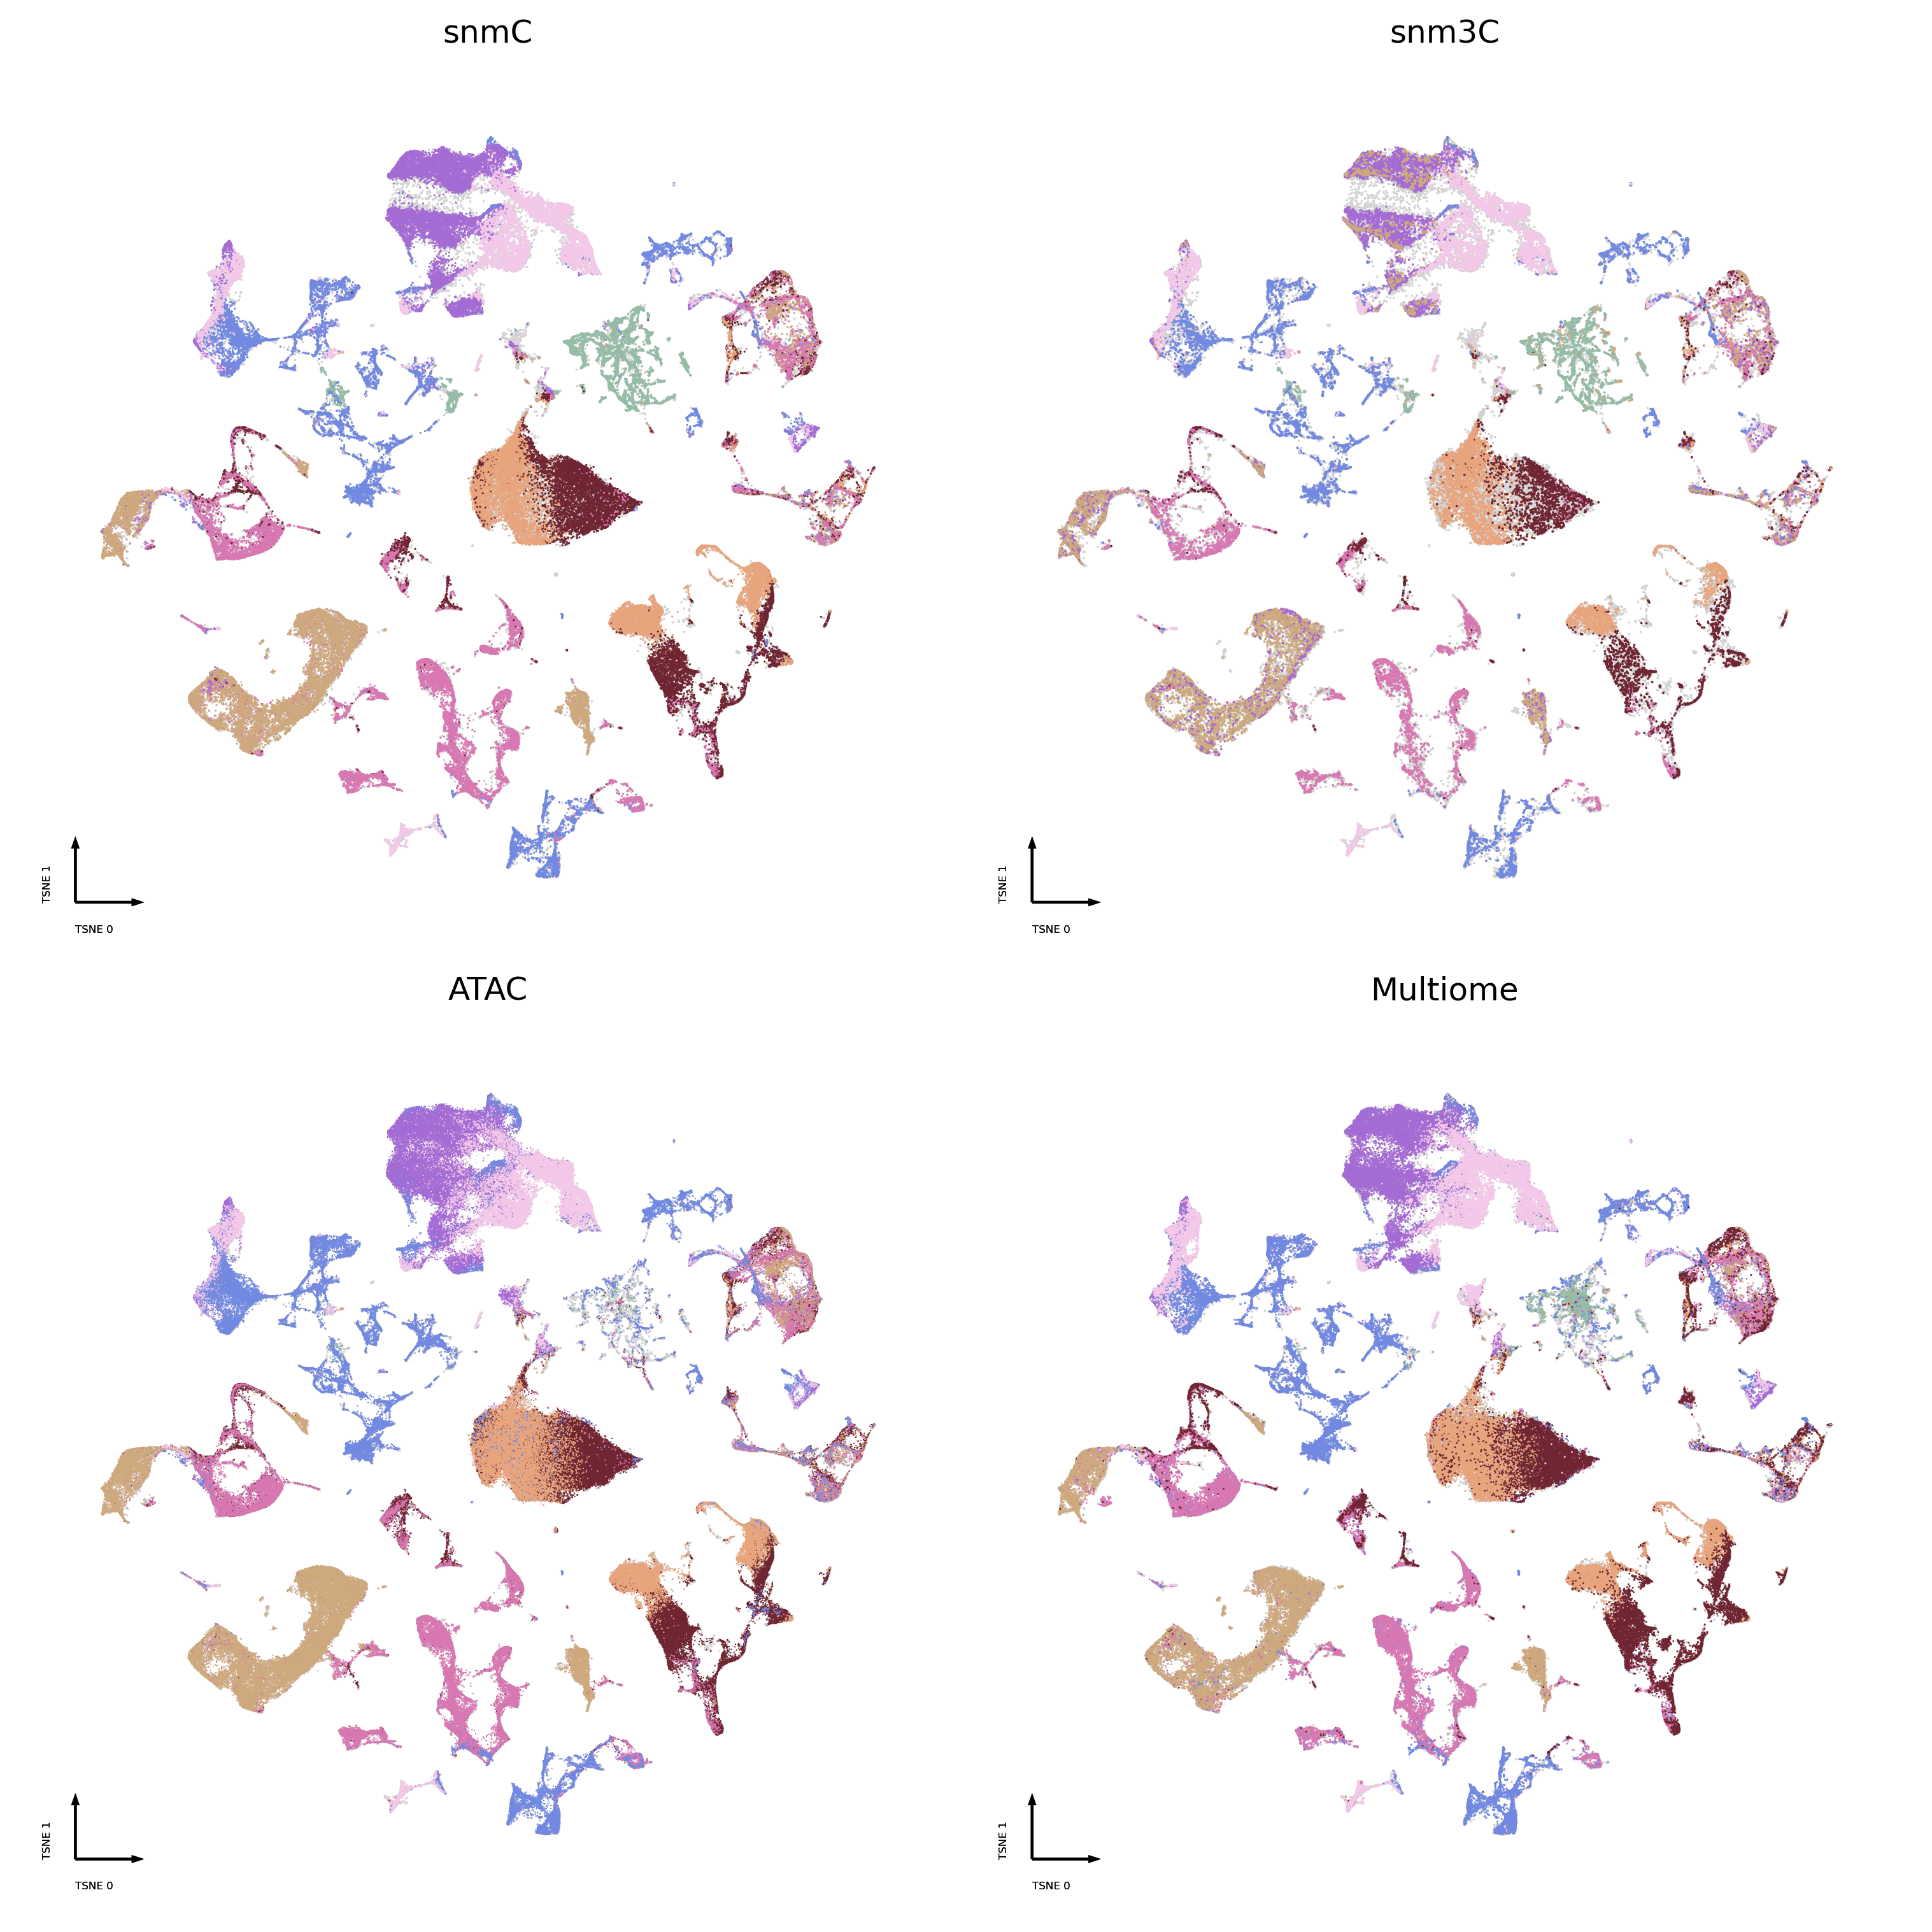

In [8]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2, dpi=300, constrained_layout = True)

ax = axes[0,0]

categorical_scatter(data=adata, ax=ax, rasterized=True, color="lightgrey", coord_base="tsne")
categorical_scatter(
    data=mc_adata,
    ax=ax,
    hue = _var,
    max_points=None,
    coord_base="tsne",
    rasterized=True, 
    palette=major_region_palette,
)
ax.set_title('snmC')

ax = axes[0,1]
categorical_scatter(data=adata, ax=ax, rasterized=True, color="lightgrey", coord_base="tsne")
categorical_scatter(
    data=m3c_adata,
    ax=ax,
    hue = _var,
    max_points=None,
    coord_base="tsne",
    rasterized=True, 
    palette= major_region_palette,
)
ax.set_title('snm3C')


ax = axes[1,0]

categorical_scatter(data=adata, ax=ax, rasterized=True, color="lightgrey", coord_base="tsne")
categorical_scatter(
    data=atac_adta,
    ax=ax,
    hue = _var,
    max_points=None,
    coord_base="tsne",
    rasterized=True, 
    palette= major_region_palette,
)
ax.set_title('ATAC')


ax = axes[1,1]

categorical_scatter(data=adata, ax=ax, rasterized=True, color="lightgrey", coord_base="tsne")
categorical_scatter(
    data=multiome_adata,
    ax=ax,
    hue = _var,
    max_points=None,
    coord_base="tsne",
    rasterized=True, 
    palette= major_region_palette,
)
ax.set_title('Multiome')
fig.savefig(f'{_var}.pdf', bbox_inches = 'tight')